In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 10
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2pvaG5jaGVuL0RvY3VtZW50cy9Tb2x1dGlvbnMvY291cnNlLXdlYnNpdGUvc2xpZGVzLzA5'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/importlib/_bootstrap.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/importlib/_bootstrap_external.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/zipimport.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/codecs.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/aliases.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/__init__.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/utf_8.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.

In [2]:
#| label: setup

# Import all required libraries
# Data handling and manipulation
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning and preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.kernel_approximation import RBFSampler

# Model selection
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer

# Statistical models
import statsmodels.api as sm
from statsmodels.nonparametric.smoothers_lowess import lowess
import operator

# Scientific computing
from scipy.interpolate import UnivariateSpline, interp1d, CubicSpline, make_interp_spline

# Design matrices
from patsy import dmatrix

# Generalized Additive Models
from pygam import LinearGAM, s, f

# Set the default style for visualization
sns.set_theme(style = "white", palette = "colorblind")

# Increase font size of all Seaborn plot elements
sns.set(font_scale = 1.25)

In [3]:
from skimpy import clean_columns

tucsonTemp = pd.read_csv("data/tucsonWeather.csv", encoding = 'iso-8859-1')[["STATION", "NAME", "DATE", "TAVG"]]
tucsonTemp = clean_columns(tucsonTemp)
tucsonTemp['date'] = pd.to_datetime(tucsonTemp['date'])
tucsonTemp['date_numeric'] = (tucsonTemp['date'] - tucsonTemp['date'].min()).dt.days

tucsonTemp.head()

/var/folders/r0/k4l4y5td4vv9z4hb8qx7k45m0000gp/T/ipykernel_74862/3636319793.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tucsonTemp['date'] = pd.to_datetime(tucsonTemp['date'])


,station,name,date,tavg,date_numeric
0,US1AZPM0322,"CATALINA 1.6 S, AZ US",2023-01-01,NaN,0
1,US1AZPM0322,"CATALINA 1.6 S, AZ US",2023-01-02,NaN,1
2,US1AZPM0322,"CATALINA 1.6 S, AZ US",2023-01-03,NaN,2
3,US1AZPM0322,"CATALINA 1.6 S, AZ US",2023-01-04,NaN,3
4,US1AZPM0322,"CATALINA 1.6 S, AZ US",2023-01-05,NaN,4


In [4]:
tucsonTemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47731 entries, 0 to 47730
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   station       47731 non-null  object        
 1   name          47731 non-null  object        
 2   date          47731 non-null  datetime64[ns]
 3   tavg          718 non-null    float64       
 4   date_numeric  47731 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 1.8+ MB


In [5]:
tucsonTemp.describe()
tucsonTemp = tucsonTemp[tucsonTemp['tavg'] > 0]

In [6]:
tusconTemp = tucsonTemp.dropna()
tusconTemp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 718 entries, 6831 to 45728
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   station       718 non-null    object        
 1   name          718 non-null    object        
 2   date          718 non-null    datetime64[ns]
 3   tavg          718 non-null    float64       
 4   date_numeric  718 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 33.7+ KB


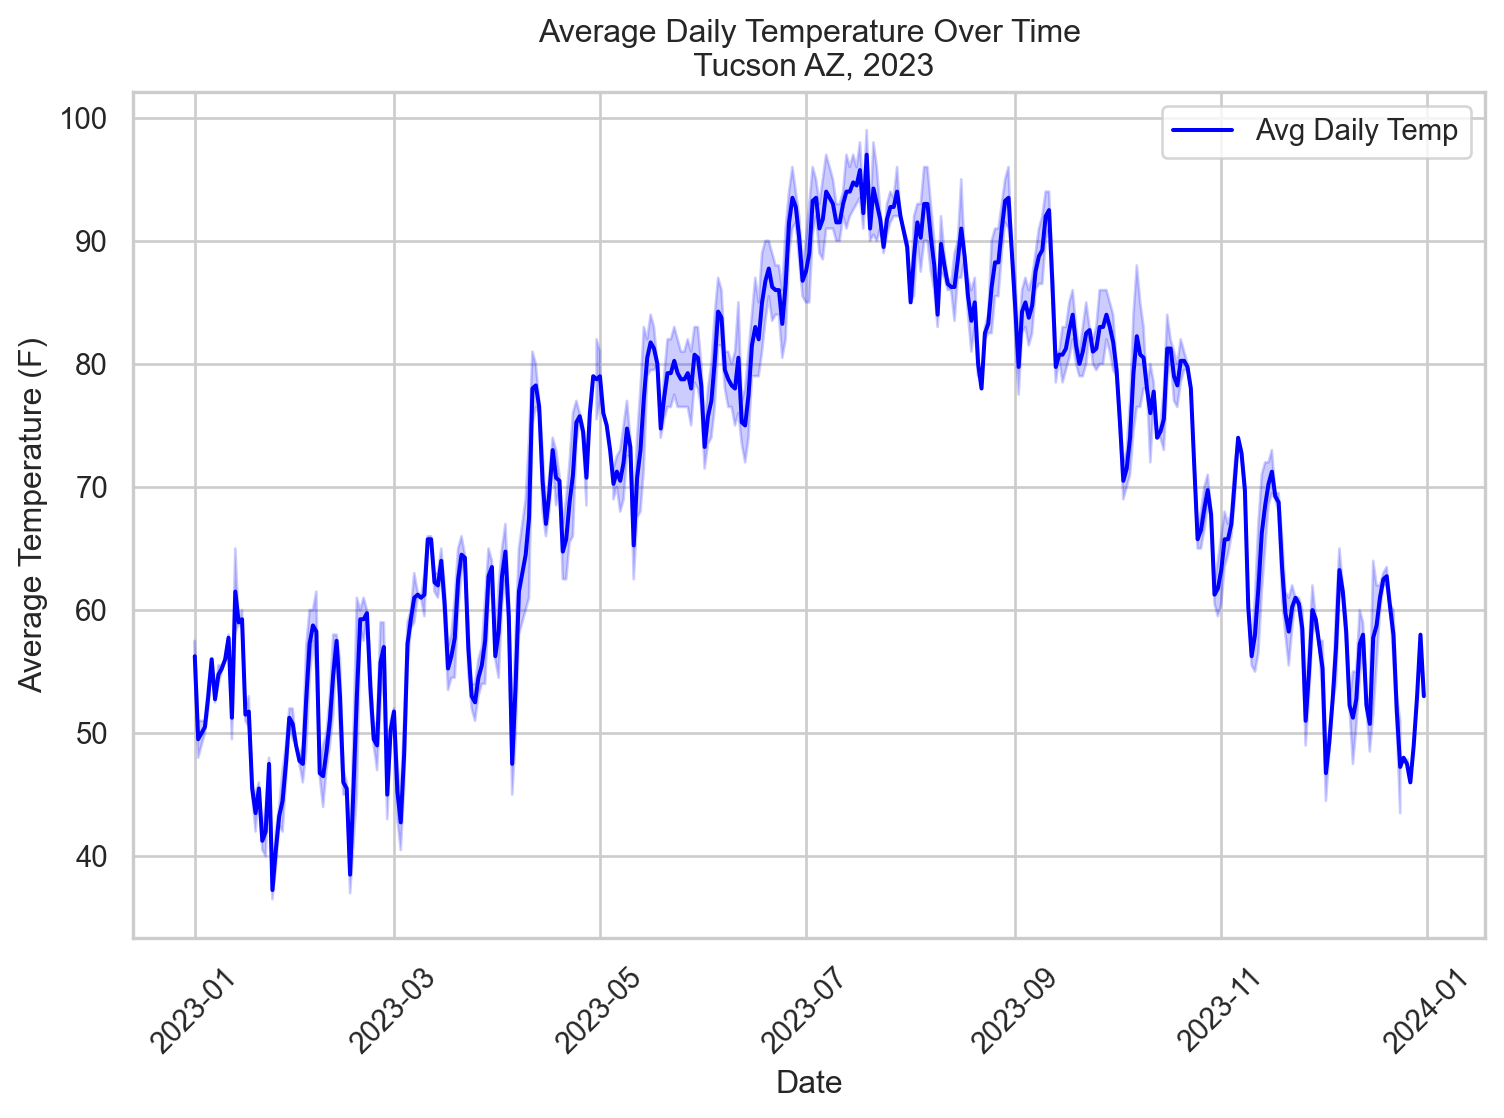

In [7]:
#| echo: false
sns.set_theme(style = "whitegrid")
plt.figure(figsize = (8, 6))
sns.lineplot(x = 'date', y = 'tavg', data = tucsonTemp, color = 'blue', label = 'Avg Daily Temp')

plt.title('Average Daily Temperature Over Time\n Tucson AZ, 2023')
plt.xlabel('Date')
plt.ylabel('Average Temperature (F)')
plt.xticks(rotation = 45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to make room for the rotated x-axis labels
plt.legend()
plt.show()

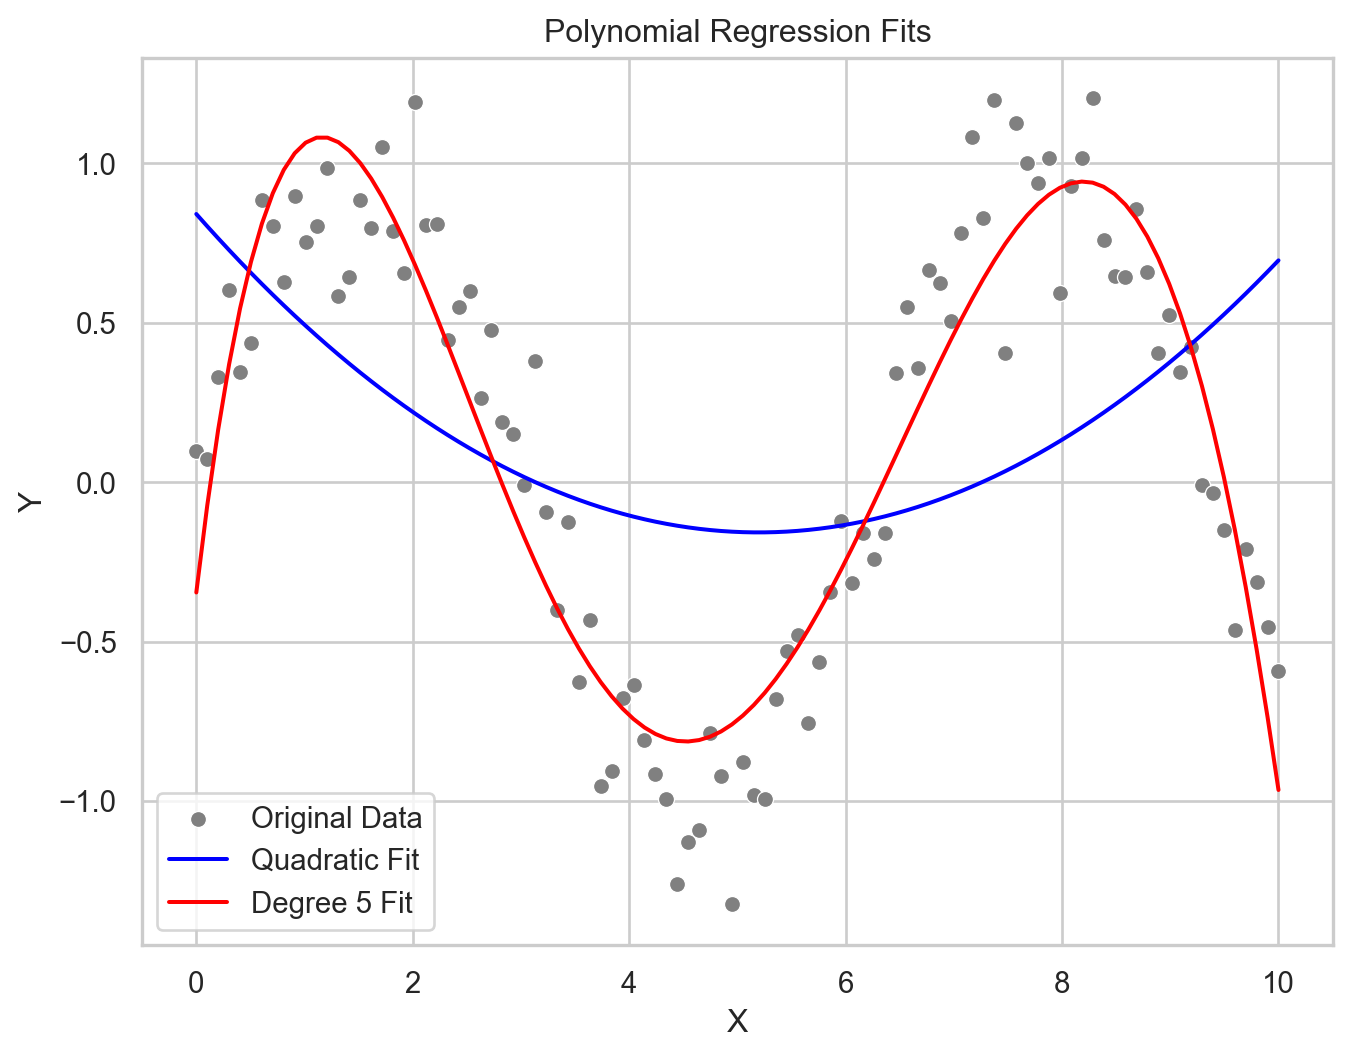

In [8]:
#| echo: false

# Generate synthetic data
np.random.seed(42)  # For reproducibility
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.2, size = len(x))

# Transform data for polynomial regression
x_reshaped = x[:, np.newaxis]

# Quadratic model (degree = 2)
poly_features_2 = PolynomialFeatures(degree = 2, include_bias = False)
x_poly_2 = poly_features_2.fit_transform(x_reshaped)
model_2 = LinearRegression().fit(x_poly_2, y)

# Degree 5 model
poly_features_5 = PolynomialFeatures(degree = 5, include_bias = False)
x_poly_5 = poly_features_5.fit_transform(x_reshaped)
model_5 = LinearRegression().fit(x_poly_5, y)

# Predictions for plotting
x_fit = np.linspace(0, 10, 100)
x_fit_reshaped = x_fit[:, np.newaxis]
x_fit_poly_2 = poly_features_2.transform(x_fit_reshaped)
x_fit_poly_5 = poly_features_5.transform(x_fit_reshaped)

y_pred_2 = model_2.predict(x_fit_poly_2)
y_pred_5 = model_5.predict(x_fit_poly_5)

# Preparing data for seaborn plotting
df_plot = pd.DataFrame({'X': x_fit, 'Quadratic Fit': y_pred_2, 'Degree 5 Fit': y_pred_5})

# Plotting with seaborn
plt.figure(figsize = (8, 6))
sns.scatterplot(x = x, y = y, color = 'gray', label = 'Original Data')
sns.lineplot(x = 'X', y = 'Quadratic Fit', data = df_plot, label = 'Quadratic Fit', color = 'blue')
sns.lineplot(x = 'X', y = 'Degree 5 Fit', data = df_plot, label = 'Degree 5 Fit', color = 'red')
plt.title('Polynomial Regression Fits')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [9]:
#| code-fold: true
X = tucsonTemp[['date_numeric']].values
y = tucsonTemp['tavg'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Transforming data for polynomial regression
poly_features = PolynomialFeatures(degree = 2)  # Adjust degree as necessary
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Fit the model with polynomial features
linear_reg.fit(X_train_poly, y_train)

# Predict on the testing set
y_pred = linear_reg.predict(X_test_poly)

# Calculate and print the MSE and R-squared
mse_initial = mean_squared_error(y_test, y_pred)
r2_initial = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {round(mse_initial, 2)}')
print(f'R-squared: {round(r2_initial, 2)}')

Mean Squared Error: 55.6
R-squared: 0.76


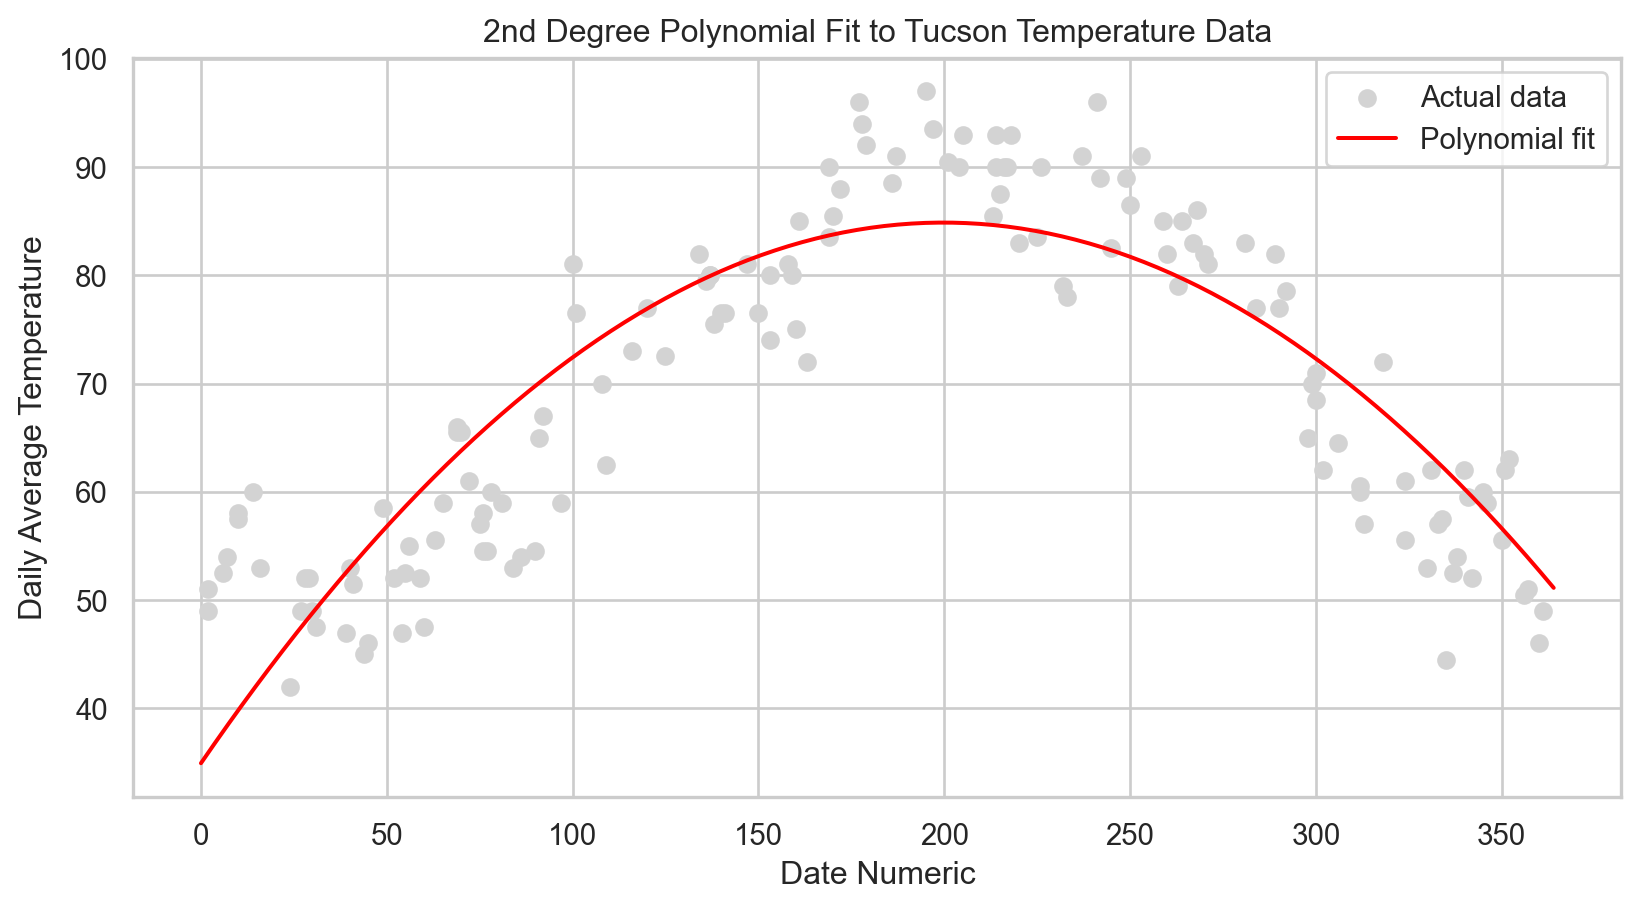

In [10]:
#| code-fold: true
# Scatter plot of the actual data points
plt.scatter(X_test, y_test, color = 'lightgray', label = 'Actual data')

# To plot the polynomial curve, we need to sort the values because the line plot needs to follow the order of X
# Create a sequence of values from the minimum to the maximum X values for plotting the curve
X_plot = np.linspace(np.min(X), np.max(X), 100).reshape(-1, 1)

# Transform the plot data for the polynomial model
X_plot_poly = poly_features.transform(X_plot)

# Predict y values for the plot data
y_plot = linear_reg.predict(X_plot_poly)

# Plot the polynomial curve
plt.plot(X_plot, y_plot, color = 'red', label = 'Polynomial fit')

# Labeling the plot
plt.xlabel('Date Numeric')
plt.ylabel('Daily Average Temperature')
plt.title('2nd Degree Polynomial Fit to Tucson Temperature Data')
plt.legend()

# Show the plot
plt.show()

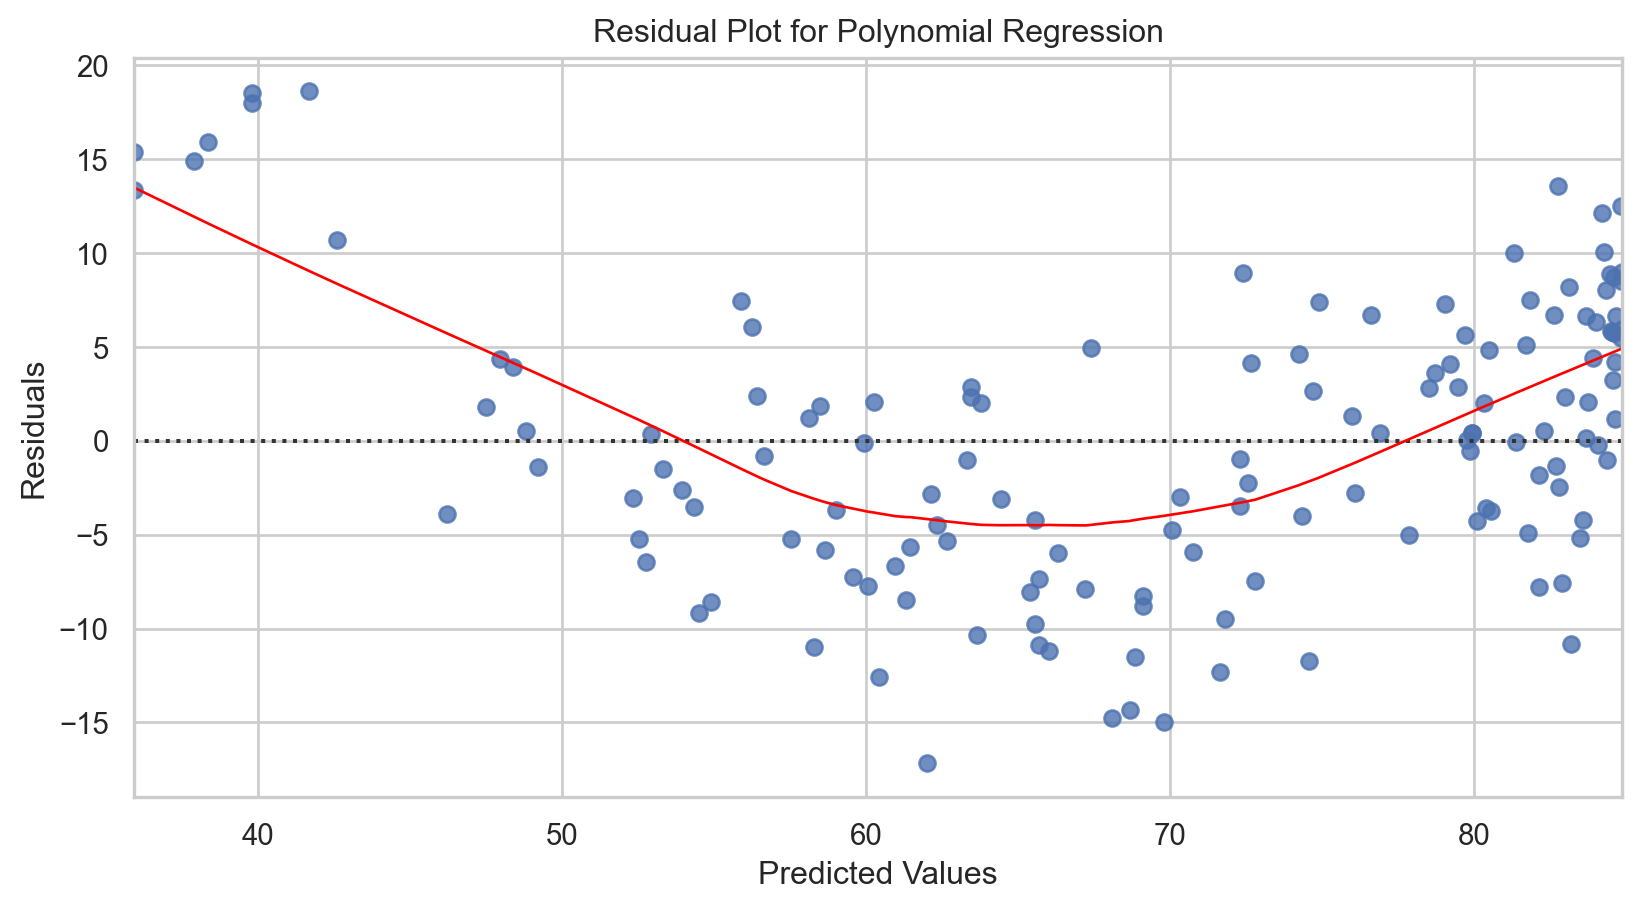

In [11]:
#| code-fold: true
residuals = y_test - y_pred
sns.residplot(x = y_pred.ravel(), y = residuals.ravel(), lowess = True, line_kws = {'color': 'red', 'lw': 1})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Polynomial Regression')
plt.show()

In [12]:
# Exploring different polynomial degrees to find the best fit
degrees = [1, 2, 3, 4, 5]
mse_scores = []
r2_scores = []

for degree in degrees:
    poly_features = PolynomialFeatures(degree = degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_pred = model.predict(X_test_poly)
    mse_scores.append(mean_squared_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

# Display the MSE and R-squared for each degree
for degree, mse, r2 in zip(degrees, mse_scores, r2_scores):
    print(f'Degree: {degree}, MSE: {round(mse, 3)}, R-squared: {round(r2, 4)}')

Degree: 1, MSE: 222.653, R-squared: 0.0444
Degree: 2, MSE: 55.597, R-squared: 0.7614
Degree: 3, MSE: 38.106, R-squared: 0.8365
Degree: 4, MSE: 26.386, R-squared: 0.8868
Degree: 5, MSE: 26.067, R-squared: 0.8881


In [13]:
# Selecting the best degree based on previous step
best_degree = degrees[np.argmin(mse_scores)]

# Transforming data with the best degree
poly_features_best = PolynomialFeatures(degree = best_degree)
X_train_poly_best = poly_features_best.fit_transform(X_train)
X_test_poly_best = poly_features_best.transform(X_test)

# Fitting the model again
best_model = LinearRegression()
best_model.fit(X_train_poly_best, y_train)

# New predictions
y_pred_best = best_model.predict(X_test_poly_best)

# Calculate new MSE and R-squared
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
print(f'Best Degree: {best_degree}, MSE: {round(mse_best, 3)}, R-squared: {round(r2_best, 4)}')

Best Degree: 5, MSE: 26.067, R-squared: 0.8881


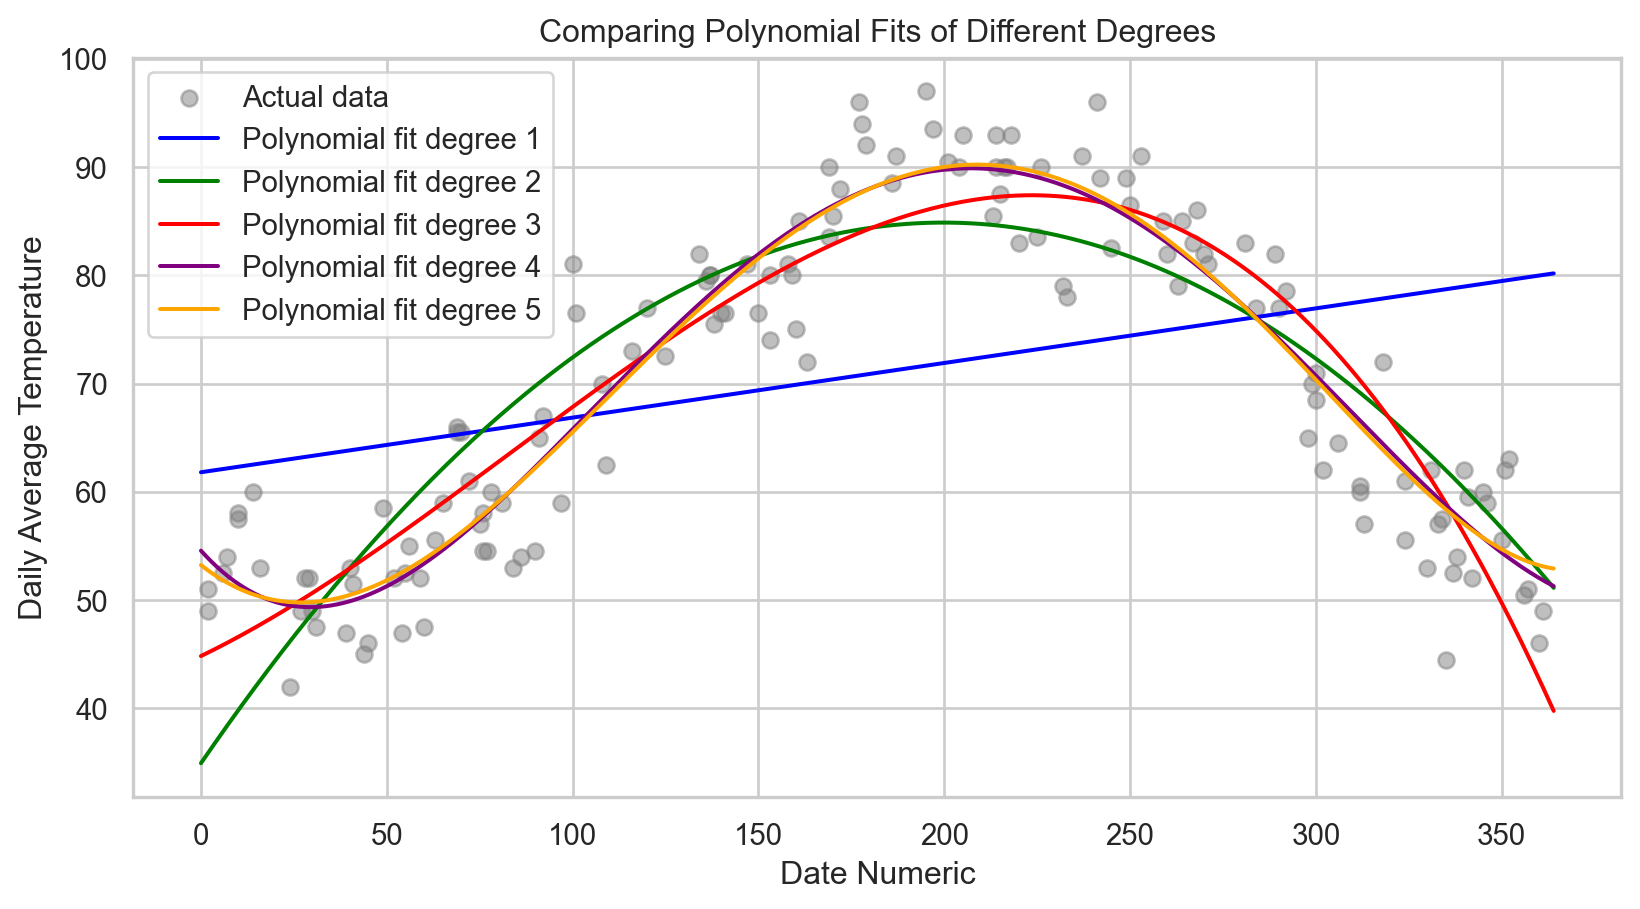

In [14]:
#| code-fold: true
# Generate a sequence of X values for plotting
X_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)

# Plot the actual data
plt.scatter(X_test, y_test, color = 'gray', alpha = 0.5, label = 'Actual data')

colors = ['blue', 'green', 'red', 'purple', 'orange']
labels = ['1st degree', '2nd degree', '3rd degree', '4th degree', '5th degree']

for i, degree in enumerate(degrees):
    # Create polynomial features for the current degree
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    X_range_poly = poly_features.transform(X_range)
    
    # Fit the Linear Regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict over the generated range of X values
    y_range_pred = model.predict(X_range_poly)
    
    # Plot
    plt.plot(X_range, y_range_pred, color = colors[i], label = f'Polynomial fit degree {degree}')

# Enhancing the plot
plt.xlabel('Date Numeric')
plt.ylabel('Daily Average Temperature')
plt.title('Comparing Polynomial Fits of Different Degrees')
plt.legend()
plt.show()

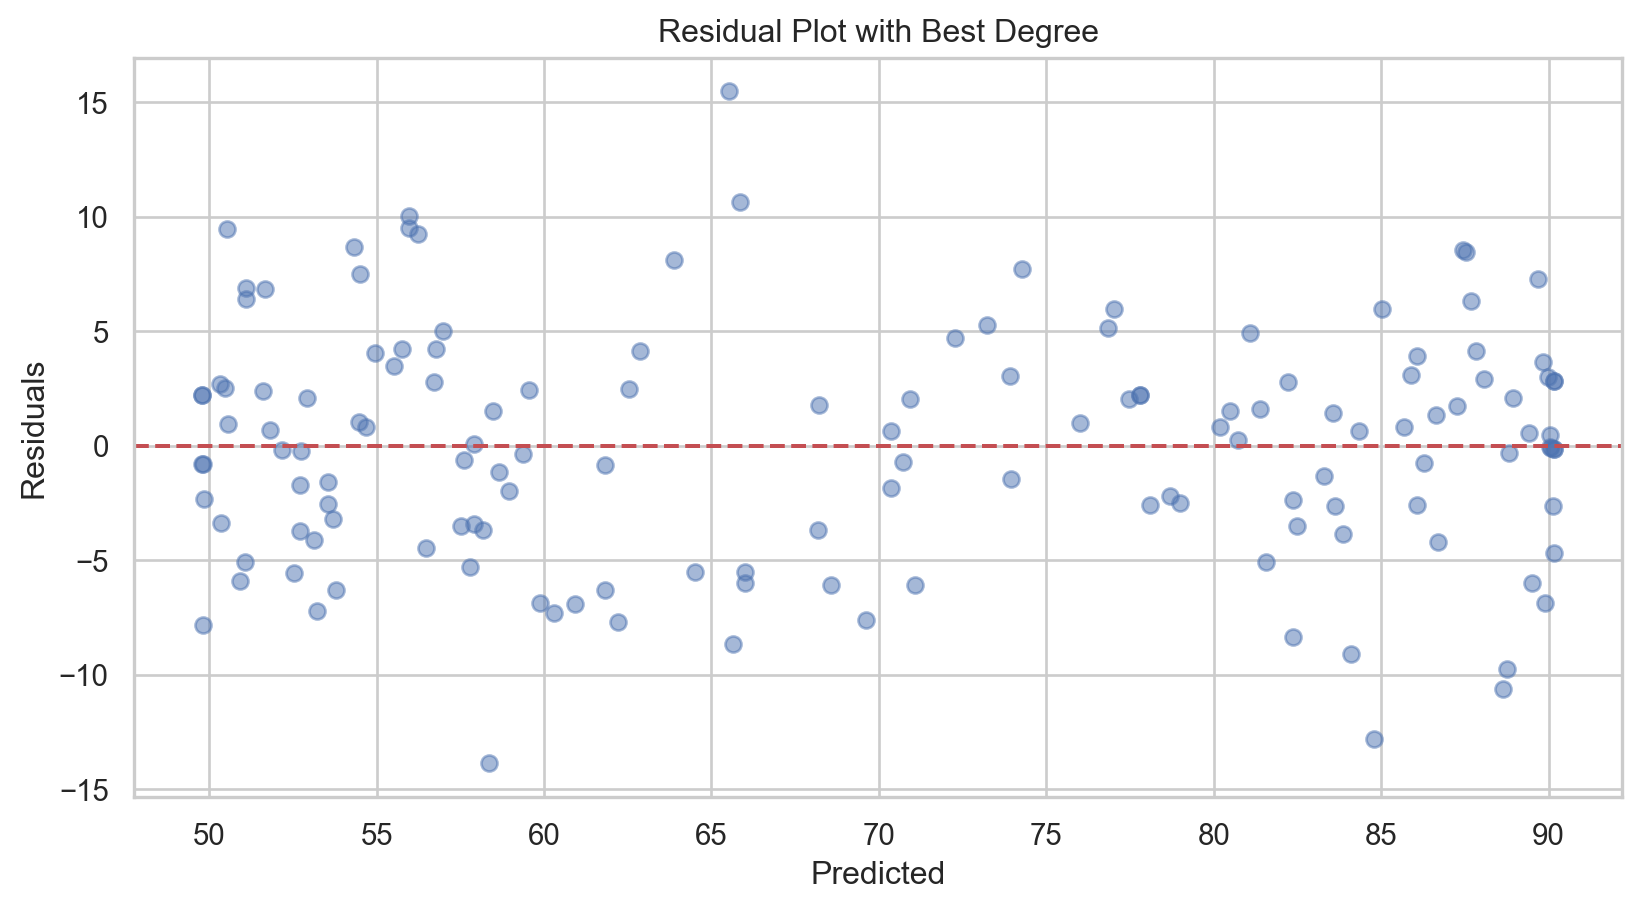

In [15]:
#| code-fold: true
residuals_best = y_test - y_pred_best
plt.scatter(y_pred_best, residuals_best, alpha = 0.5)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot with Best Degree')
plt.show()

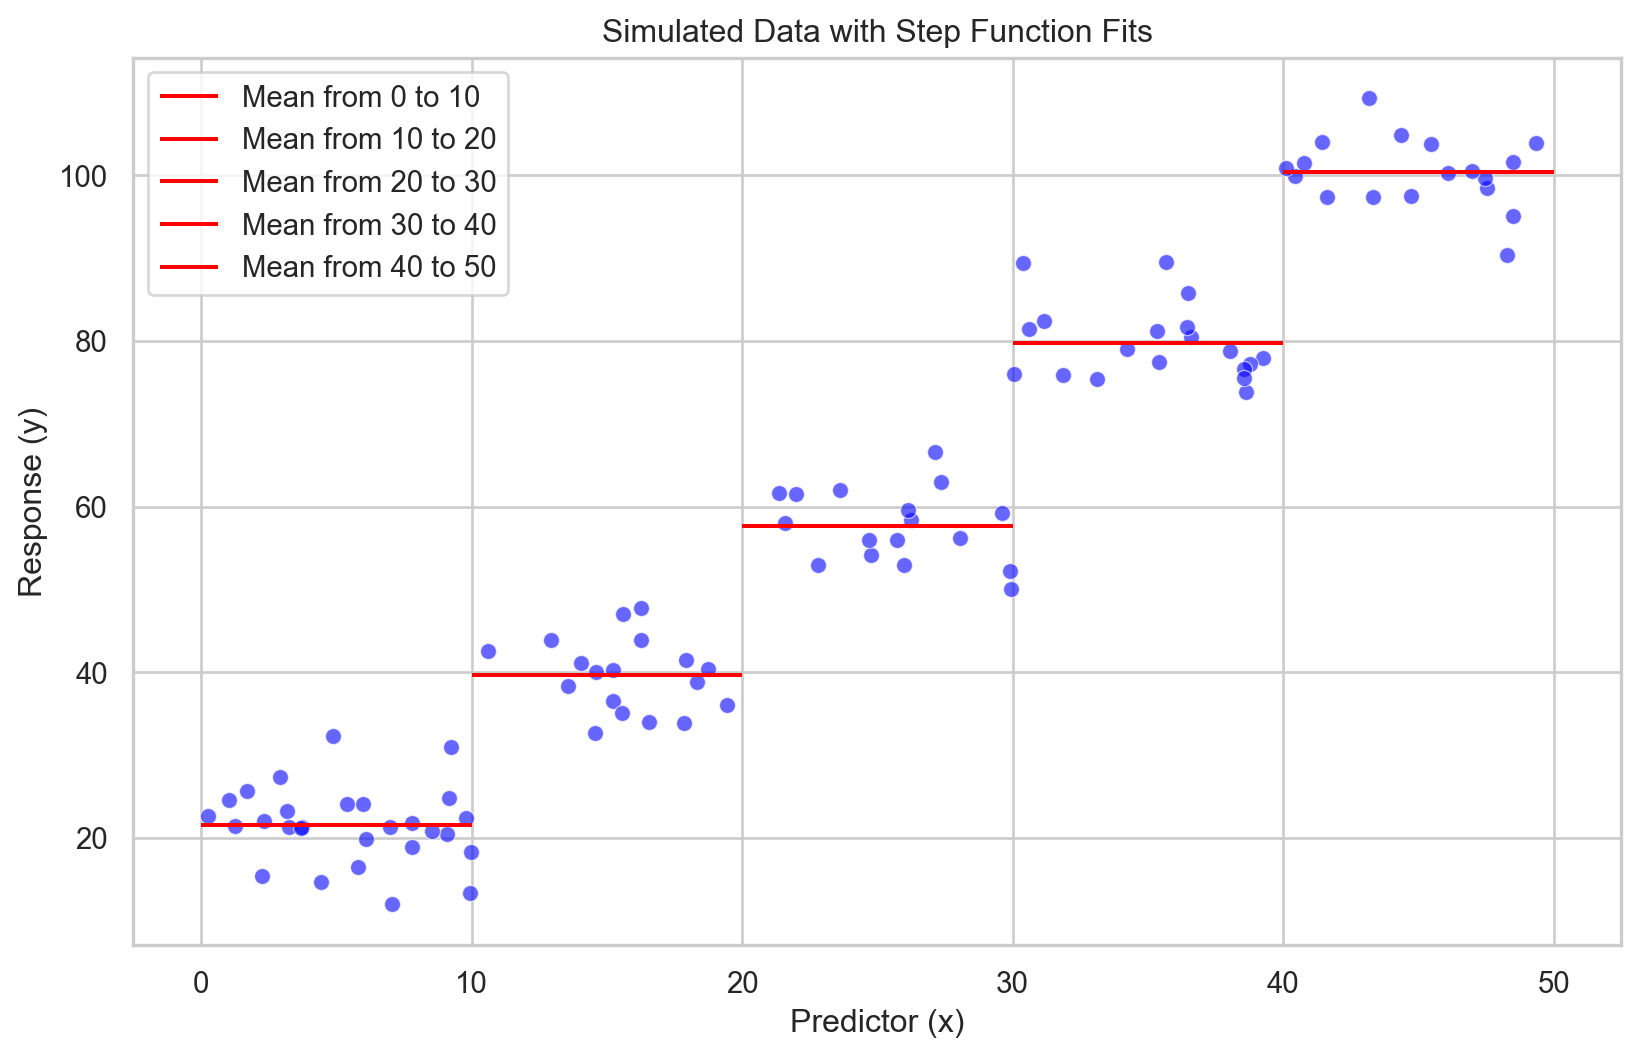

In [16]:
#| echo: false
# Seed for reproducibility
np.random.seed(42)

# Generate synthetic data
x = np.random.uniform(0, 50, 100)  # 100 data points from 0 to 50
# Define step function values
y = np.where(x < 10, 20, 
             np.where(x < 20, 40, 
                      np.where(x < 30, 60, 
                               np.where(x < 40, 80, 100))))
# Add some noise
y = y + np.random.normal(0, 5, size=len(x))

# Convert to DataFrame for easier plotting
data = pd.DataFrame({'x': x, 'y': y})

intervals = [(0, 10), (10, 20), (20, 30), (30, 40), (40, 50)]
means = []
for lower, upper in intervals:
    mask = (data['x'] >= lower) & (data['x'] < upper)
    mean_y = data.loc[mask, 'y'].mean()
    means.append((lower, upper, mean_y))

# Plot the original data
plt.figure(figsize = (10, 6))
sns.scatterplot(data = data, x = 'x', y = 'y', color = 'blue', alpha = 0.6)

# Add horizontal lines for each step
for lower, upper, mean_y in means:
    plt.hlines(mean_y, lower, upper, colors = 'red', label = f'Mean from {lower} to {upper}')

# Enhance the plot
plt.title('Simulated Data with Step Function Fits')
plt.xlabel('Predictor (x)')
plt.ylabel('Response (y)')
# We create a custom legend because each hlines call adds a new legend entry
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Remove duplicate labels
plt.legend(by_label.values(), by_label.keys())
plt.show()

In [17]:
#| code-fold: true
# Define the step function intervals
step_intervals = [0, 100, 200, 300, 400]
tucsonTemp['step_bins'] = pd.cut(tucsonTemp['date_numeric'], bins = step_intervals, labels=False)

# Prepare the data for step function fitting
X = pd.get_dummies(tucsonTemp['step_bins'], drop_first = True).values
y = tucsonTemp['tavg'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Fit the step function model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate and print the MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 53.23
R-squared: 0.77


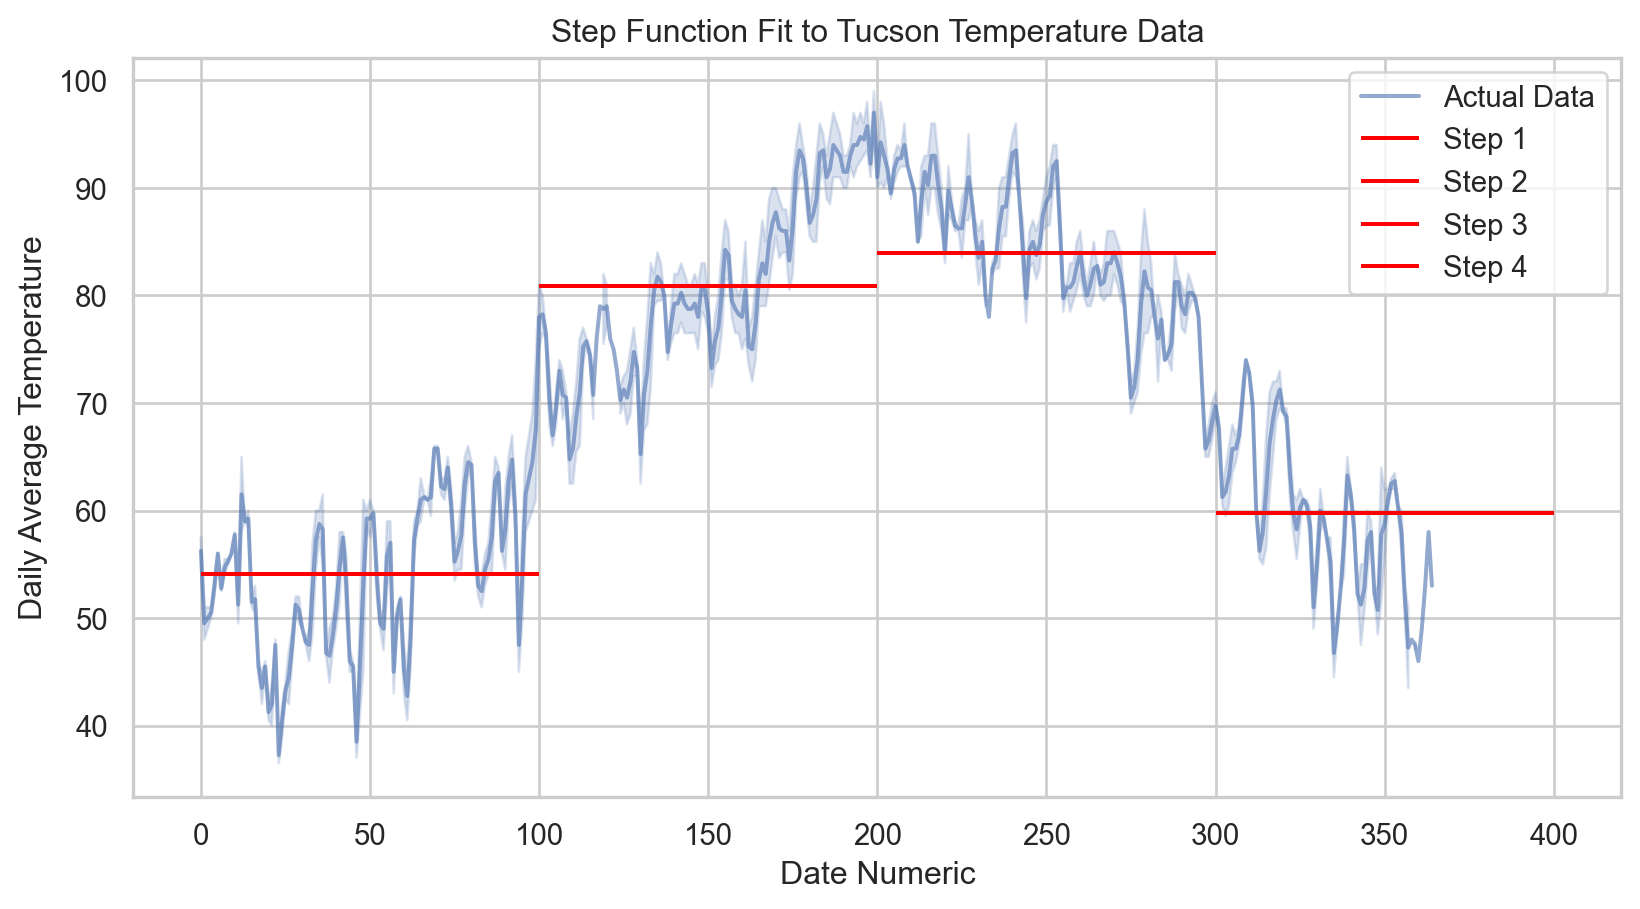

In [18]:
#| code-fold: true
# Plotting the step function fit
sns.lineplot(x = tucsonTemp['date_numeric'], y = tucsonTemp['tavg'], label = 'Actual Data', alpha = 0.6)

# Generate the step function values for the plot
for i, (lower, upper) in enumerate(zip(step_intervals[:-1], step_intervals[1:])):
    mask = (tucsonTemp['date_numeric'] >= lower) & (tucsonTemp['date_numeric'] < upper)
    plt.hlines(y[mask].mean(), lower, upper, colors = 'red', label = f'Step {i+1}')

plt.xlabel('Date Numeric')
plt.ylabel('Daily Average Temperature')
plt.title('Step Function Fit to Tucson Temperature Data')
plt.legend()
plt.show()

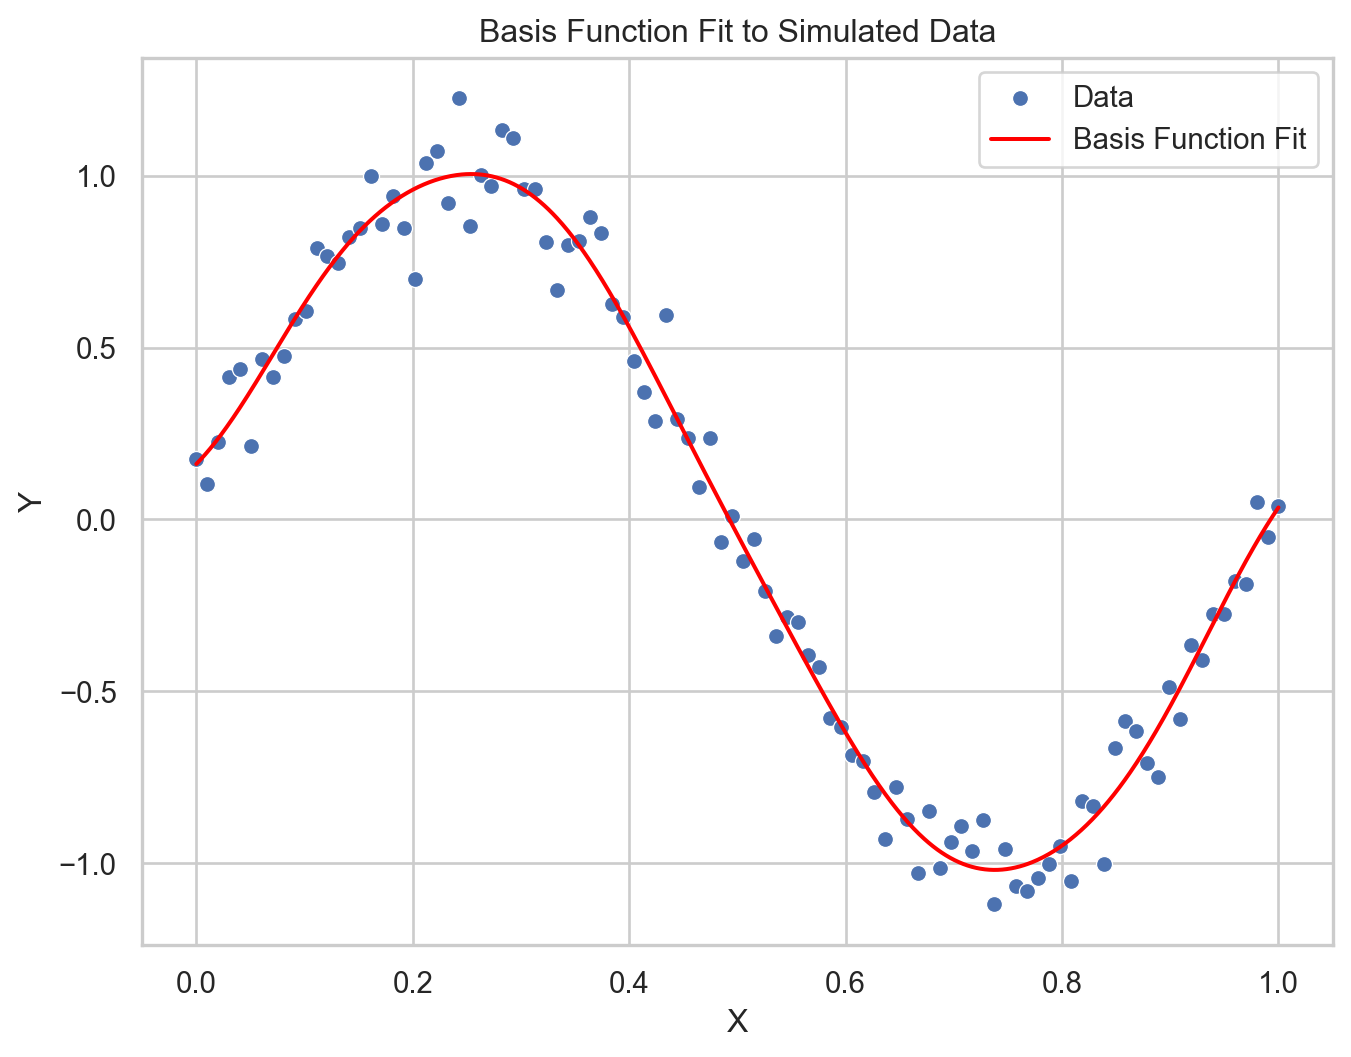

In [19]:
#| echo: false

# Seed for reproducibility
np.random.seed(0)

# Generate synthetic data
x = np.linspace(0, 1, 100)
y_true = np.sin(2 * np.pi * x)
y = y_true + np.random.normal(scale = 0.1, size = x.shape)

# Define Gaussian basis functions
def gaussian_basis(x, mu, s):
    return np.exp(-((x - mu)**2) / (2 * s**2))

# Define centers and width of the Gaussian basis functions
mus = np.linspace(0, 1, 10)
s = 0.1

# Apply the Gaussian basis functions to the data
X_basis = np.column_stack([gaussian_basis(x, mu, s) for mu in mus])

# Fit a linear model
model = LinearRegression()
model.fit(X_basis, y)

# Predict using the model to get the line fit
x_fit = np.linspace(0, 1, 1000)
X_basis_fit = np.column_stack([gaussian_basis(x_fit, mu, s) for mu in mus])
y_fit = model.predict(X_basis_fit)

# Create DataFrame for seaborn
plot_data = pd.DataFrame({
    'x': x_fit,
    'y': y_fit
})

# Visualize the data and the basis function fit
plt.figure(figsize = (8, 6))
sns.scatterplot(x = x, y = y, label = 'Data')
sns.lineplot(x = 'x', y = 'y', data = plot_data, color = 'red', label = 'Basis Function Fit')
plt.title('Basis Function Fit to Simulated Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [20]:
#| code-fold: true

# Splitting the dataset
X = tucsonTemp[['date_numeric']].values
y = tucsonTemp['tavg'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


# Create the basis function model
model = make_pipeline(RBFSampler(gamma = 1.0, n_components=50, random_state=42), LinearRegression())

# Fit the model
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Calculate and print the MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 93.76
R-squared: 0.60


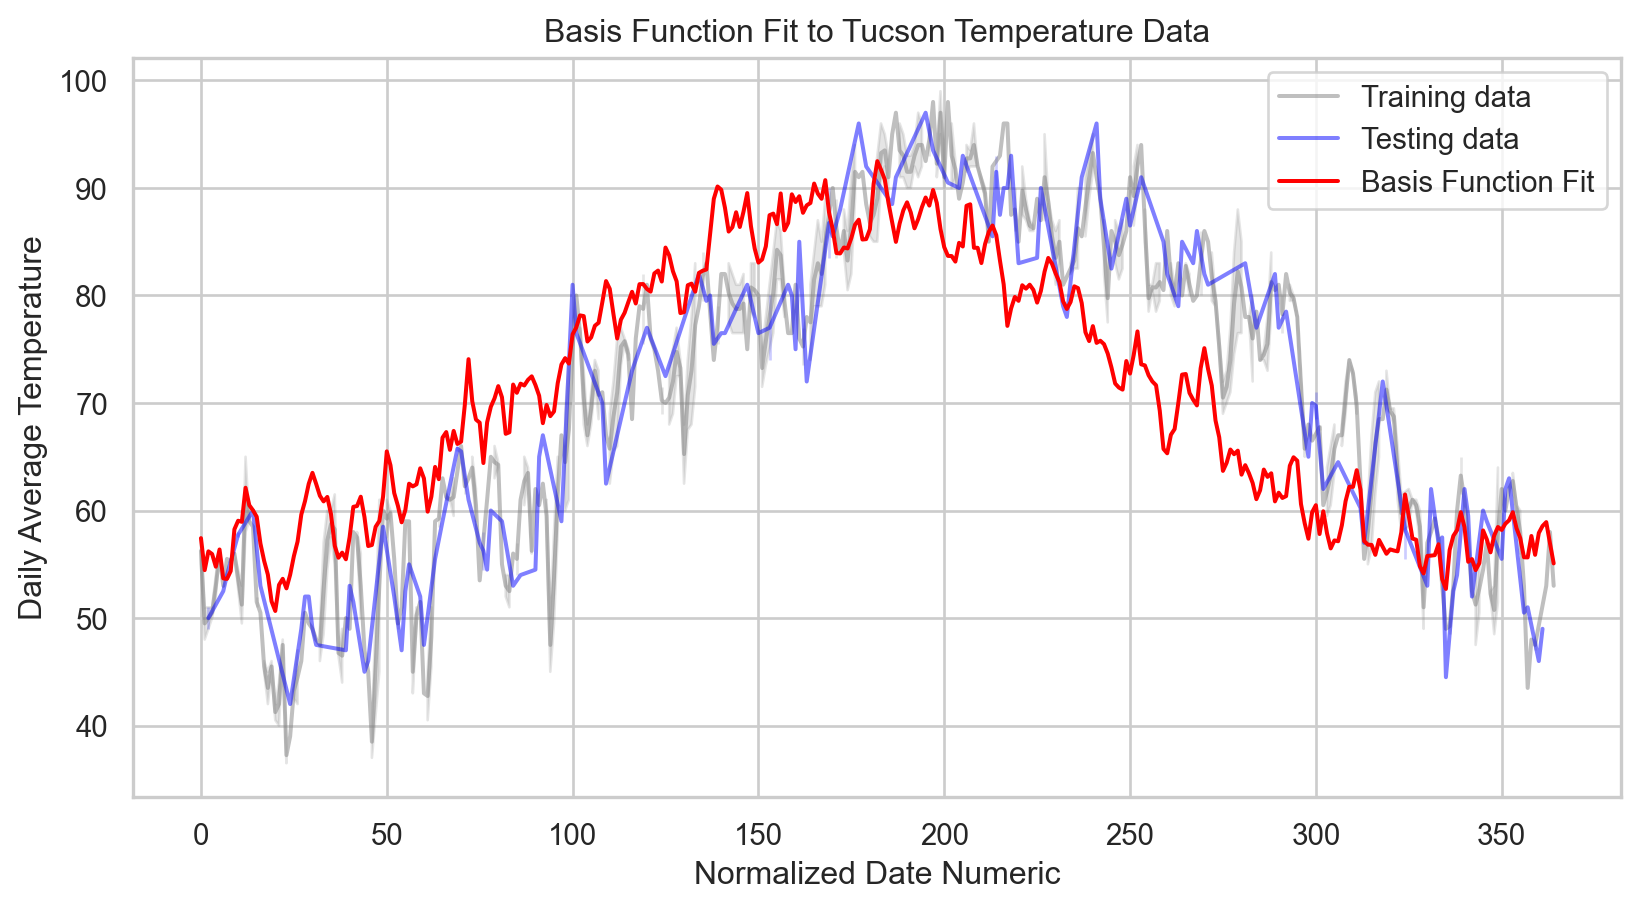

In [21]:
#| code-fold: true
# Predict on a grid for a smooth line
np.random.seed(42)
num_samples = 365
x_grid = np.linspace(X.min(), X.max(), num_samples).reshape(-1, 1)
y_grid_pred = model.predict(x_grid)

# Plotting the actual data points and the basis function fit
sns.lineplot(x = X_train.squeeze(), y = y_train, color = 'gray', label = 'Training data', alpha = 0.5)
sns.lineplot(x = X_test.squeeze(), y = y_test, color = 'blue', label = 'Testing data', alpha = 0.5)
sns.lineplot(x = x_grid.squeeze(), y = y_grid_pred, color = 'red', label = 'Basis Function Fit')

# Labeling the plot
plt.xlabel('Normalized Date Numeric')
plt.ylabel('Daily Average Temperature')
plt.title('Basis Function Fit to Tucson Temperature Data')
plt.legend()
plt.show()

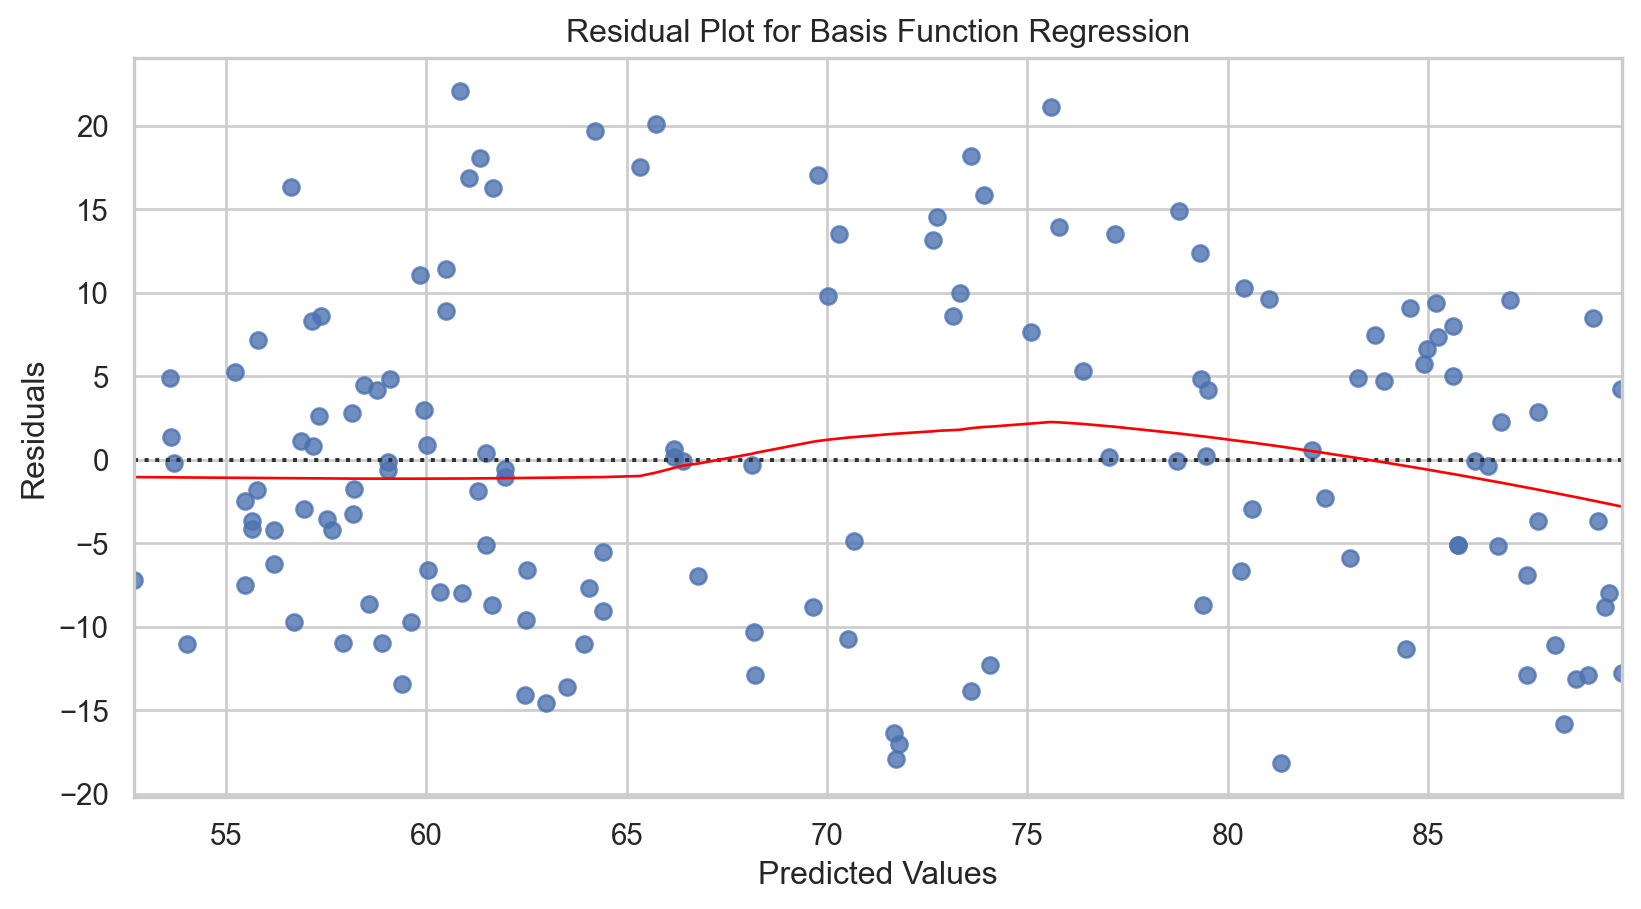

In [22]:
#| code-fold: true
# Calculating residuals
residuals = y_test - y_pred

# Plotting residuals
sns.residplot(x = y_pred, y = residuals, lowess = True, line_kws = {'color': 'red', 'lw': 1})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Basis Function Regression')
plt.show()

In [23]:
#| code-fold: true
# First search: random Search to narrow down the range for hyperparameters
random_param_grid = {
    'rbfsampler__gamma': np.logspace(-3, 0, 4),  # Wider range for gamma
    'rbfsampler__n_components': np.linspace(50, 500, 10).astype(int)  # Wider range for n_components
}

# Create a custom scorer for cross-validation
mse_scorer = make_scorer(mean_squared_error, greater_is_better = False)


# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    model,
    param_distributions = random_param_grid,
    n_iter = 10,  # Number of parameter settings that are sampled
    scoring = mse_scorer,
    cv = 5,
    random_state = 42
)

# Fit the model
random_search.fit(X_train, y_train)

# Second search: grid Search to fine-tune the hyperparameters
# Use best parameters from random search as the center point for the grid search
best_gamma = random_search.best_params_['rbfsampler__gamma']
best_n_components = random_search.best_params_['rbfsampler__n_components']
refined_param_grid = {
    'rbfsampler__gamma': np.linspace(best_gamma / 2, best_gamma * 2, 5),
    'rbfsampler__n_components': [best_n_components - 50, best_n_components, best_n_components + 50]
}

# Initialize GridSearchCV with the refined grid
grid_search = GridSearchCV(
    model,
    param_grid = refined_param_grid,
    scoring = mse_scorer,
    cv = 5
)

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters from grid search
print(f'Best parameters after Grid Search: {grid_search.best_params_}')

# Re-initialize and fit the model with the best parameters from grid search
best_basis_model = make_pipeline(
    RBFSampler(
        gamma = grid_search.best_params_['rbfsampler__gamma'],
        n_components = grid_search.best_params_['rbfsampler__n_components'],
        random_state = 42
    ),
    LinearRegression()
)
best_basis_model.fit(X_train, y_train)

# Make new predictions with the best model
y_pred_best = best_basis_model.predict(X_test)

# Calculate R-squared and Mean Squared Error (MSE) with the best model
r2_best = r2_score(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
print(f'Mean Squared Error: {round(mse_best, 3)}')
print(f'R-squared: {round(r2_best, 4)}')

Best parameters after Grid Search: {'rbfsampler__gamma': np.float64(0.0016250000000000001), 'rbfsampler__n_components': np.int64(350)}
Mean Squared Error: 20.12
R-squared: 0.9136


In [24]:
# Calculate the original MSE and r-squared scored
mse_initial = mean_squared_error(y_test, y_pred)
r2_initial = r2_score(y_test, y_pred)

# Print comparison
print(f'Initial MSE: {round(mse_initial, 3)}, Best Parameters MSE: {round(mse_best, 3)}')
print(f'Initial R-squared: {round(r2_initial, 4)}, Best Parameters R-squared: {round(r2_best, 5)}')

Initial MSE: 93.762, Best Parameters MSE: 20.12
Initial R-squared: 0.5976, Best Parameters R-squared: 0.91365


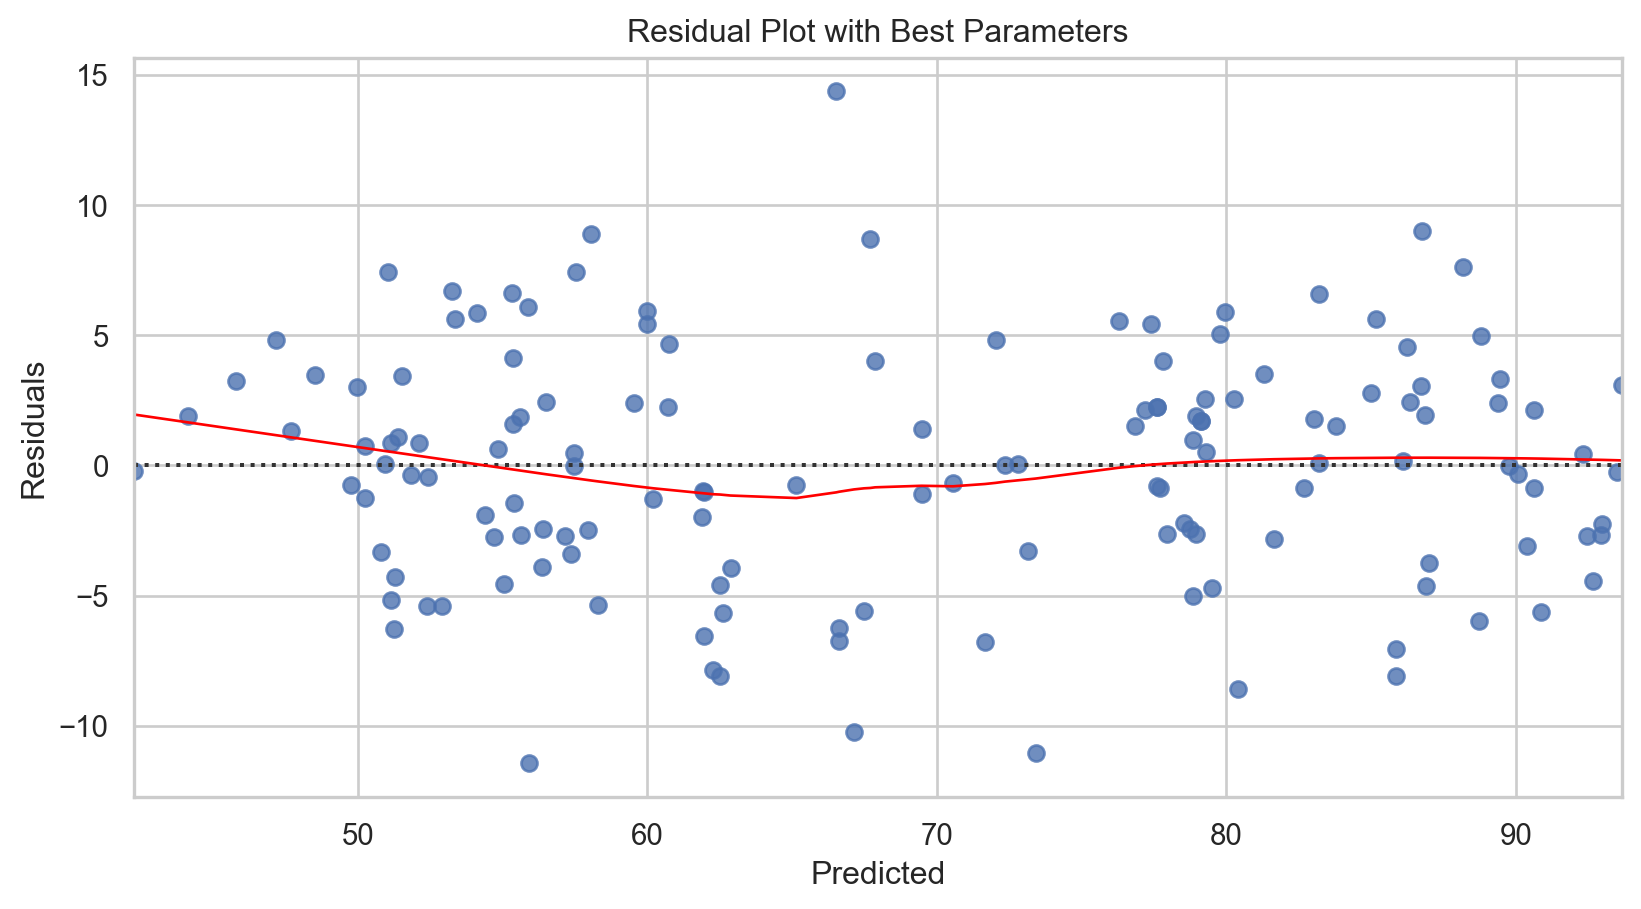

In [25]:
#| code-fold: true
residuals_best = y_test - y_pred_best
sns.residplot(x = y_pred_best, y = residuals_best, lowess = True, line_kws = {'color': 'red', 'lw': 1})
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot with Best Parameters')
plt.show()

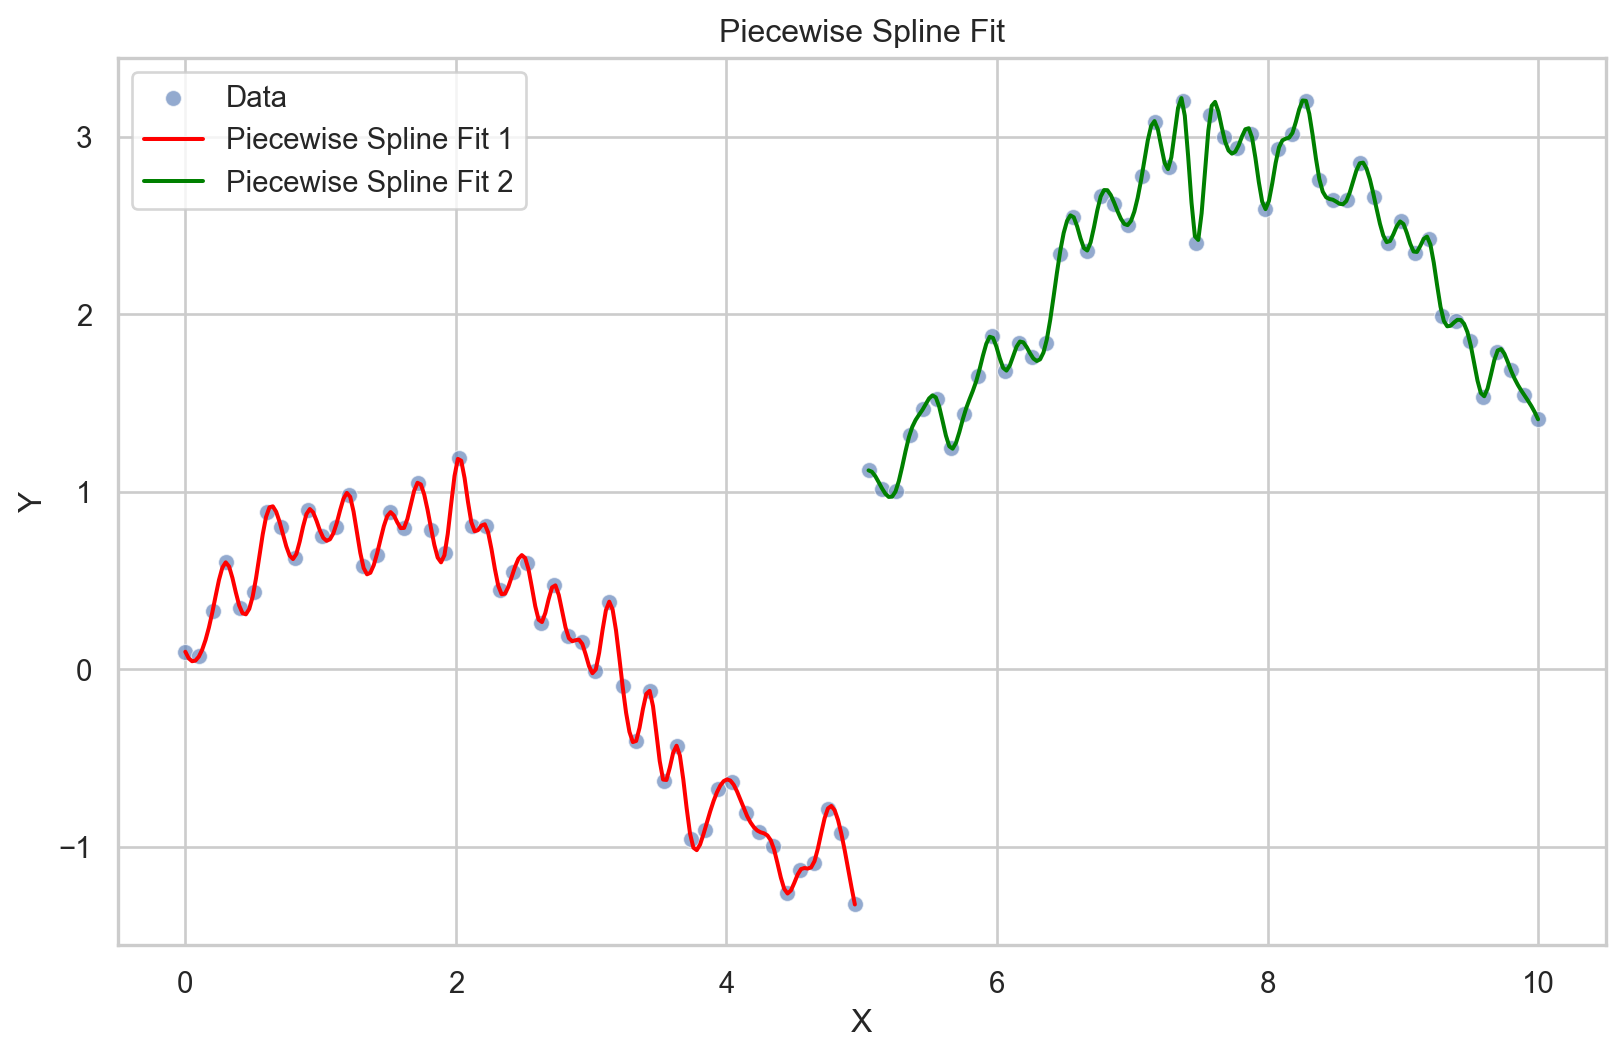

In [26]:
#| echo: false
# Re-define x and y if they have been altered
x = np.linspace(0, 10, 100)
y = np.piecewise(x, [x < 5, x >= 5], [lambda x: np.sin(x), lambda x: np.sin(x) + 2])
y += np.random.normal(scale=0.2, size=x.shape)

# Ensure x and y are of the same length as the condition
assert x.shape == y.shape, "x and y must have the same shape"

# Split the data around the knot to fit piecewise splines correctly
x1, y1 = x[x < 5], y[x < 5]
x2, y2 = x[x >= 5], y[x >= 5]

# Fit splines to each data segment; adjust degree (k) as needed
spline1 = make_interp_spline(x1, y1, k = 3)
spline2 = make_interp_spline(x2, y2, k = 3)

# Generate smooth lines for visualization
x_smooth1 = np.linspace(x1.min(), x1.max(), 200)
y_smooth1 = spline1(x_smooth1)

x_smooth2 = np.linspace(x2.min(), x2.max(), 200)
y_smooth2 = spline2(x_smooth2)

# Visualization
plt.figure(figsize = (10, 6))
sns.scatterplot(x = x, y = y, label = 'Data', alpha = 0.6)
plt.plot(x_smooth1, y_smooth1, color = 'red', label = 'Piecewise Spline Fit 1')
plt.plot(x_smooth2, y_smooth2, color = 'green', label = 'Piecewise Spline Fit 2')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Piecewise Spline Fit')
plt.legend()
plt.show()

In [27]:
#| code-fold: true
# Assign variables
X = tucsonTemp[['date_numeric']].values
y = tucsonTemp['tavg'].values

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Ensure X_train and y_train are sorted by X_train
sorted_indices = np.argsort(X_train.squeeze())
X_train_sorted = X_train[sorted_indices].squeeze()  # Convert to 1D
y_train_sorted = y_train[sorted_indices]

# Define initial knots based on domain knowledge or quantiles
initial_knots = np.quantile(X_train_sorted, [0.25, 0.5, 0.75])

# Adjust knots to include the full range of X_train_sorted
knots = np.concatenate(([X_train_sorted.min()], initial_knots, [X_train_sorted.max()]))

# Function to handle duplicates by averaging y values for duplicate x values
def unique_with_average(X, Y):
    unique_X, indices = np.unique(X, return_inverse = True)
    avg_Y = np.array([Y[indices == i].mean() for i in range(len(unique_X))])
    return unique_X, avg_Y

splines = []

for i in range(len(knots) - 1):
    mask = (X_train_sorted >= knots[i]) & (X_train_sorted < knots[i+1])
    X_segment = X_train_sorted[mask]
    y_segment = y_train_sorted[mask]
    
    # Ensure X_segment is strictly increasing by handling duplicates
    X_segment_unique, y_segment_avg = unique_with_average(X_segment, y_segment)
    
    if len(X_segment_unique) >= 4:  # Ensuring there are enough points
        spline = CubicSpline(X_segment_unique, y_segment_avg, bc_type='natural')
        splines.append((knots[i], knots[i+1], spline))

# Predict function needs updating to loop over splines correctly
def predict_with_splines(X, splines, knots):
    y_pred = np.zeros_like(X)
    for i, x_val in enumerate(X):
        for start, end, spline in splines:
            if start <= x_val < end:
                y_pred[i] = spline(x_val)
                break
    return y_pred

# Predictions and evaluations
y_pred = predict_with_splines(X_test.squeeze(), splines, knots)  # Ensure X_test is 1D for the function

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 16.80
R-squared: 0.93


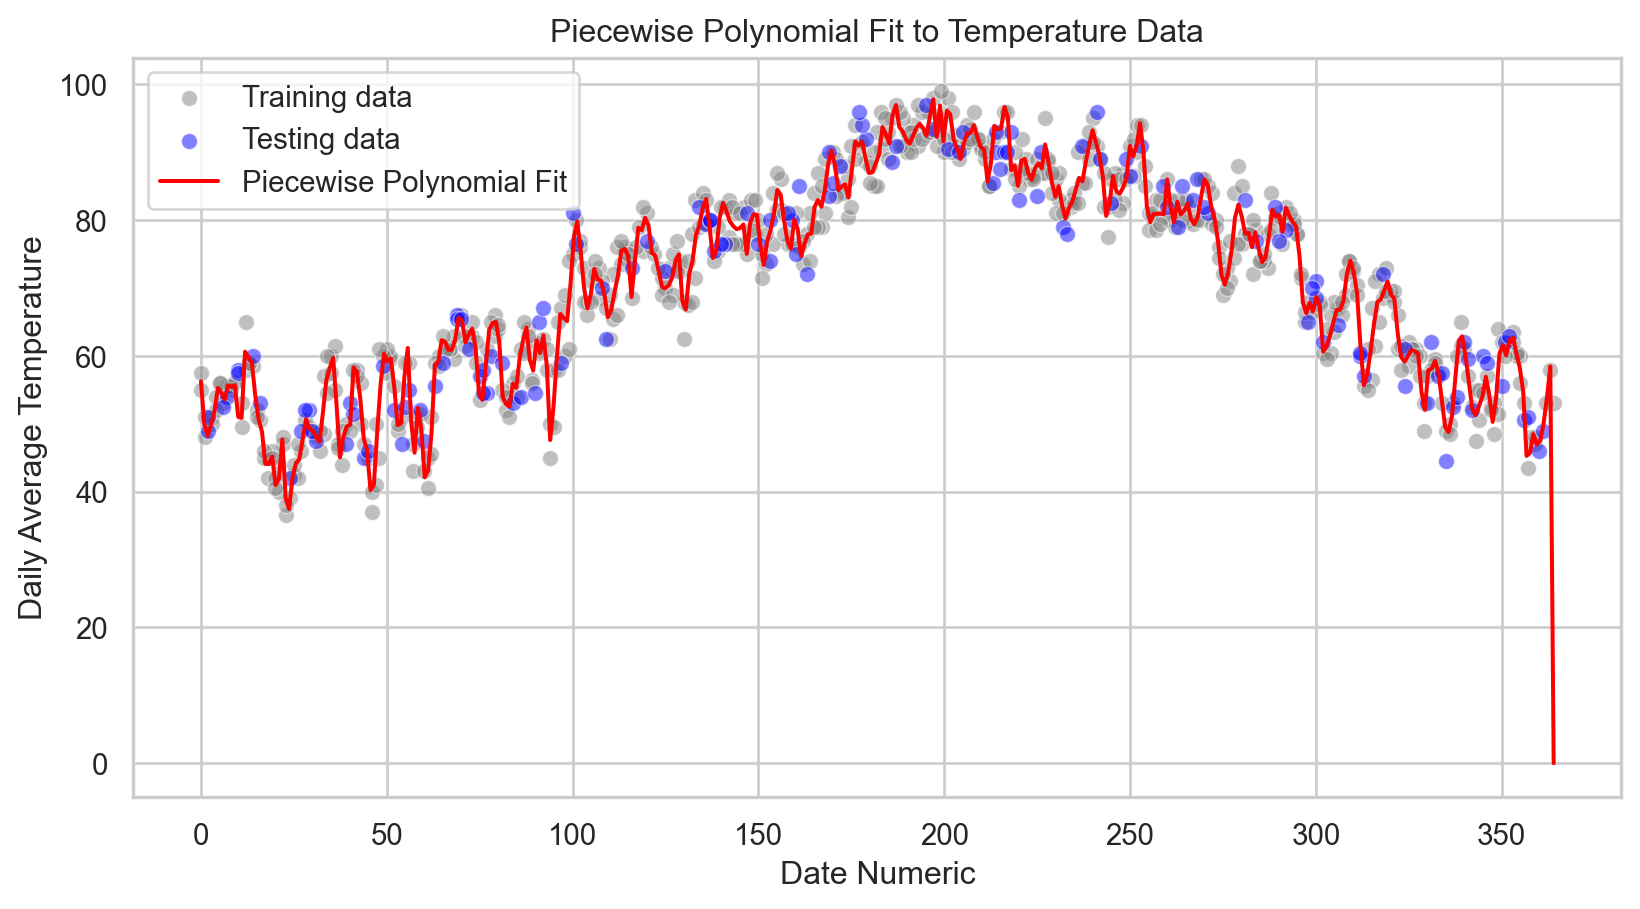

In [28]:
#| code-fold: true
# Visualization of the training and testing data
sns.scatterplot(x = X_train.squeeze(), y = y_train, color = 'gray', label = 'Training data', alpha = 0.5)
sns.scatterplot(x = X_test.squeeze(), y = y_test, color = 'blue', label = 'Testing data', alpha = 0.5)

# Assuming splines and knots are correctly calculated as per previous steps
x_range = np.linspace(X.min(), X.max(), 400).squeeze()
y_range_pred = predict_with_splines(x_range, splines, knots)

sns.lineplot(x = x_range, y = y_range_pred, color = 'red', label = 'Piecewise Polynomial Fit')
plt.xlabel('Date Numeric')
plt.ylabel('Daily Average Temperature')
plt.title('Piecewise Polynomial Fit to Temperature Data')
plt.legend()
plt.show()

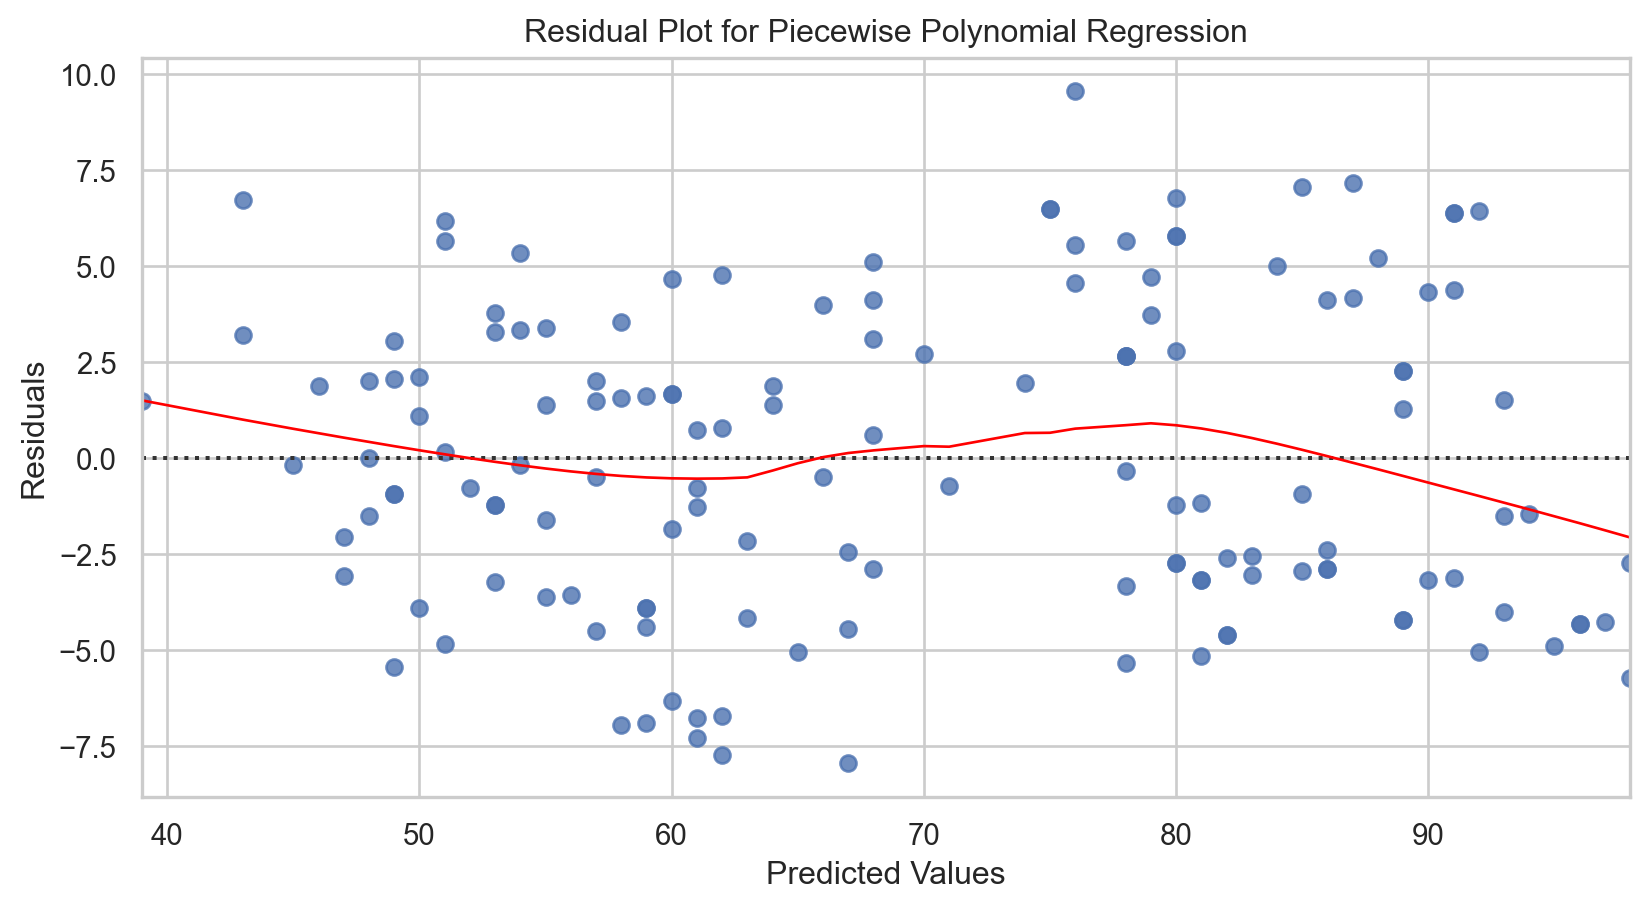

In [29]:
#| code-fold: true
# Calculating residuals
residuals = y_test - predict_with_splines(X_test.squeeze(), splines, knots)

# Plotting residuals
sns.residplot(x = y_pred, y = residuals, lowess = True, line_kws = {'color': 'red', 'lw': 1})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Piecewise Polynomial Regression')
plt.show()